#  Topic Modeling and Feature Enginering of Hostels Data
# Create DF for calculating hostel distance
- want to find topics for hostel descriptions
- form a dataframe of probabilities that a topic is in a hostel descrition 
- make numberic columns for hostel features
- combine relevnat hostel columns with topic prob df 

In [2]:
import pandas as pd
from IPython.display import display
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import seaborn as sns
%matplotlib inline
from gensim import corpora, models, matutils
from collections import defaultdict
from sklearn.feature_extraction import text
import numpy as np

In [3]:
# import clean revs data

hostels_df = pd.read_csv('/Users/caitlinmowdy/Desktop/DSI-SF-2-caitlinmowdy/capstone-hostelworld/clean-data/clean_hostles_oct7.csv')
display(hostels_df.shape, hostels_df.head(1),hostels_df.columns.values)

(5453, 17)

,Unnamed: 0,rating,desc,FREE,GENERAL,SERVICES,FOOD_DRINK,ENTERTAINMENT,POLICIES,hostel,location,num_awards,rev_highlights,country,city,hostel_id,country_id
0,0,2.0,[stay with us near to the city center of budap...,"[Linen Included , Free City Maps , Towels Incl...","[Breakfast Not Included, Air Conditioning, Out...","[Airport Transfers, Bicycle Hire, Luggage Stor...","[Restaurant, Meals Available, ]","[Wi-Fi, ]",[],Fortuna Botel,"Budapest, Hungary",0,[],Hungary,Budapest,0,28.0


array(['Unnamed: 0', 'rating', 'desc', 'FREE', 'GENERAL', 'SERVICES',
       'FOOD_DRINK', 'ENTERTAINMENT', 'POLICIES', 'hostel', 'location',
       'num_awards', 'rev_highlights', 'country', 'city', 'hostel_id',
       'country_id'], dtype=object)

## Observe the distribution of word counts

In [4]:
vectorizer = CountVectorizer(stop_words= 'english', ngram_range=(2,2))
X = vectorizer.fit_transform(hostels_df.desc)
X.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

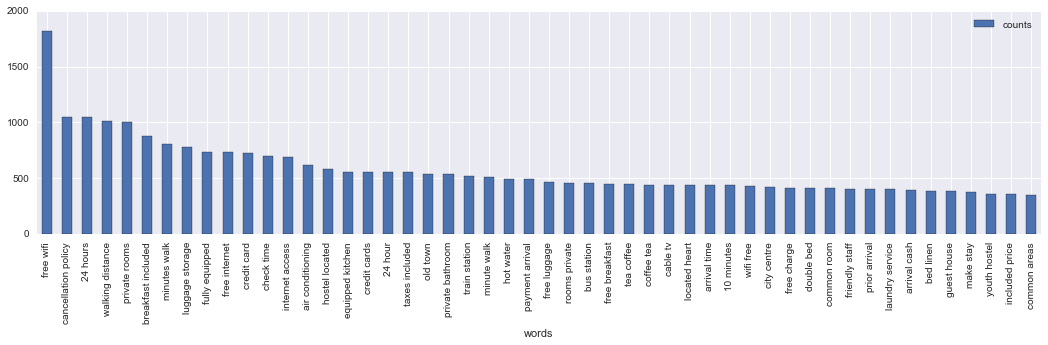

In [5]:
words = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
word_count = words.sum(axis=0).reset_index()
word_count.columns = ['words','counts']
word_count.sort_values('counts', ascending=False, inplace=True)
word_count.head(50).plot(x='words', y='counts', kind='bar', figsize=(18,4))

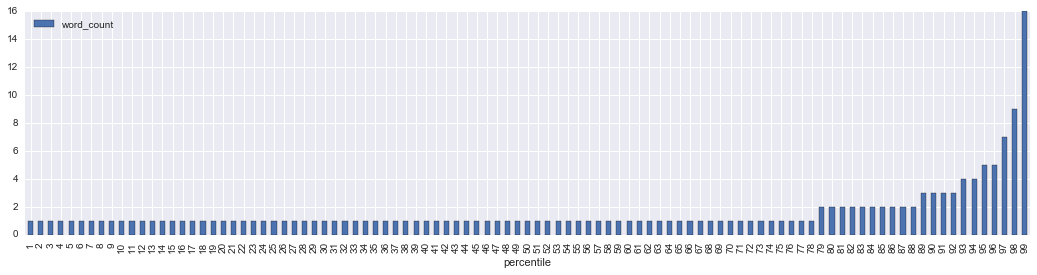

In [6]:
# look at what percentiles counts fall in 
# The counts of words are normally distributed

word_count_percentiles = pd.DataFrame({
        'percentile':np.arange(1,100,1),
        'word_count':np.percentile(word_count.counts, np.arange(1., 100., 1))
    })
word_count_percentiles.plot(x='percentile', y='word_count', kind='bar', figsize=(18,4))

## Use CountVectorizeer and LdaModel to create topics for hostel descriptions

In [29]:
# these are words I've decided to add to my stop words through a process of trial and error
stop_wrds = ['hostel','hostels','customer','ive','comment','nice','place','did','10','min', 'youre',
             'minutes','friendly','bit','minute','think','know','im','sure','great','temple','nights',
             'really','stayed','hotel','like','just','didnt','id','ok','stay','dont','ve','light','red',
             'wasnt','definitely','best','good','didn','don','free', 'walking', 'walk','taxes','payment','time',
            'hours', 'storage','prior','card']

# make a list my_stop_words with english stop words and new stop words
my_stop_words = text.ENGLISH_STOP_WORDS.union(stop_wrds)

In [34]:
vectorizer = CountVectorizer(ngram_range=(2,2),stop_words=my_stop_words,max_df=.1)

X = vectorizer.fit_transform(hostels_df.desc)
X.todense()

vocab2 = {v: k for k, v in vectorizer.vocabulary_.iteritems()}


In [35]:
lda2 = models.LdaModel(
   matutils.Sparse2Corpus(X, documents_columns=False),
   num_topics  =  10,
   passes      =  25,
   iterations = 2500,
   id2word     =  vocab2,
   eval_every = 100,
   chunksize = 2000
)
lda2.print_topics(num_topics=10, num_words=5)


[(0,
  u'0.001*equipped kitchen + 0.001*24 hour + 0.001*tea coffee + 0.001*air conditioning + 0.001*note cancellation'),
 (1,
  u'0.001*arrival cash + 0.001*credit cards + 0.001*note cancellation + 0.001*cash credit + 0.001*guest house'),
 (2,
  u'0.001*24 hour + 0.001*equipped kitchen + 0.001*hot water + 0.001*dorm rooms + 0.001*coffee tea'),
 (3,
  u'0.001*air conditioning + 0.001*train station + 0.000*shared bathroom + 0.000*old town + 0.000*common room'),
 (4,
  u'0.001*ks house + 0.001*credit cards + 0.001*old town + 0.001*train station + 0.001*air conditioning'),
 (5,
  u'0.001*hot water + 0.001*train station + 0.001*24 hour + 0.001*city centre + 0.001*laundry service'),
 (6,
  u'0.002*days arrival + 0.001*total price + 0.001*arrival date + 0.001*expected arrival + 0.001*cancellation conditions'),
 (7,
  u'0.001*double bed + 0.001*private bathroom + 0.001*air conditioning + 0.001*guest house + 0.001*shared bathroom'),
 (8,
  u'0.001*bed linen + 0.001*policies conditions + 0.001*c

In [13]:
24 hours, private rooms, breakfast included,bus station,internet access
private rooms, 24 hours, fully equipped, 24 hour,cancellation policy
cancellation policy,breakfast included, arrival cash,credit card,note cancellation
prior arrival,credit card,cancellation policy,days prior,breakfast included
private rooms,24 hours,prior arrival,total price, ks house
cancellation policy,24 hours,breakfast included,private rooms,fully equipped
private rooms,24 hours,cancellation policy,fully equipped,old town
breakfast included,cancellation polic,24 hours,guest house,arrival cash
double bed,private bathroom,breakfast included,private rooms,hot water
cancellation policy,24 hours,private rooms,breakfast included,fully equipped

SyntaxError: invalid syntax (<ipython-input-13-aa1705eae3e3>, line 1)

In [9]:
bow = []
blank_documents = 0

for document in X.toarray():

    single_document = []

    for token_id, token_count in enumerate(document):
        
        if token_count > 0:
              single_document.append((token_id, token_count))
            
    if len(single_document)>0:
        bow.append(single_document)
    else:
        blank_documents += 1
        bow.append([])
        

In [1]:
topic_proba =lda2.get_document_topics(bow)

NameError: name 'lda2' is not defined

In [13]:
# put topic prob into dataframe
topic_df = np.zeros((len(topic_proba), 10))
for rowid, tp in enumerate(topic_proba):
    for colid, p in tp:
        topic_df[rowid, colid] = p
        
topic_df = pd.DataFrame(topic_df, columns=['t'+str(i+1) for i in range(topic_df.shape[1])])


In [14]:
topic_df.head(3)


,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10
0,0.0,0.986955,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
1,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.994193
2,0.0,0.000000,0.122432,0.0,0.0,0.871552,0.0,0.0,0.0,0.000000


In [17]:
# create new columns to topic porb dataframe for the sum of topic prob and max topic probabitliyt for every document

cols = topic_df.columns = ['H_t1','H_t2','H_t3','H_t4','H_t5','H_t6','H_t7','H_t8','H_t9','H_t10']
topic_df['max_prob'] =  topic_df[cols].apply(np.max, axis=1)

In [19]:
topic_df[topic_df.max_prob==0]

,H_t1,H_t2,H_t3,H_t4,H_t5,H_t6,H_t7,H_t8,H_t9,H_t10,max_prob


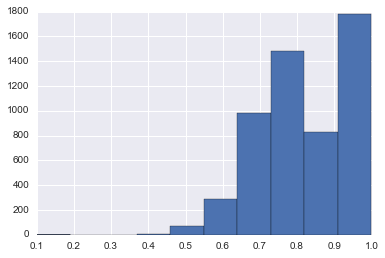

In [20]:
# look at dist of max topic prob
# want max topic prob to be high 
topic_df['max_prob'].hist()

In [21]:
# Make columns for the number of free, services, food-drink, and entertainment features hostels offer

hostels_df['num_free'] = [len(list(h.split(','))) for h in hostels_df.FREE]
hostels_df['num_serv'] = [(len(list(h.split(',')))-1) for h in hostels_df.SERVICES]
hostels_df['num_food'] = [(len(list(h.split(',')))-1) for h in hostels_df.FOOD_DRINK]
hostels_df['num_ent'] = [(len(list(h.split(',')))-1) for h in hostels_df.ENTERTAINMENT]

In [22]:
# find the most common hostel policies

cv_like = CountVectorizer(ngram_range=(2,2), binary=True, stop_words='english')#, max_features=2500
words_like = cv_like.fit_transform(hostels_df.POLICIES).todense()

summaries = "".join(hostels_df['POLICIES'])
poli_summaries = cv_like.build_analyzer()(summaries)
poli_vocab = Counter(poli_summaries).most_common(40)
poli_vocab = pd.DataFrame(poli_vocab)
poli_vocab.columns=['word','count']

In [23]:
# make a list of the most relevant top policies

keys = ['Cards Accepted','Taxes Included','Non Smoking','Child Friendly','Smoking Taxes','Age Restriction']

In [24]:
# make a column that is the number of the top policies a hostel has 

def num_polis(value):
    t = value.split(',')
    return len([k for k in keys if (str(k) in str(t))])

hostels_df['num_poli'] = hostels_df.POLICIES.map(num_polis)

In [25]:
# def to find the number of review highlights a hostel has 

def num_hl(value):
    if len(value)>2:
        value = len(value.split(','))
    else:
        value = 0
    return value

# use review highlights function to create a new column that is the number of review highlights a hostel has

hostels_df['num_highlights'] = hostels_df.rev_highlights.map(num_hl)


In [26]:
# view hostel DF with new columns 
hostels_df.head(2)

,Unnamed: 0,rating,desc,FREE,GENERAL,SERVICES,FOOD_DRINK,ENTERTAINMENT,POLICIES,hostel,...,country,city,hostel_id,country_id,num_free,num_serv,num_food,num_ent,num_poli,num_highlights
0,0,2.0,[stay with us near to the city center of budap...,"[Linen Included , Free City Maps , Towels Incl...","[Breakfast Not Included, Air Conditioning, Out...","[Airport Transfers, Bicycle Hire, Luggage Stor...","[Restaurant, Meals Available, ]","[Wi-Fi, ]",[],Fortuna Botel,...,Hungary,Budapest,0,28.0,5,6,2,1,0,0
1,1,7.5,[the equity point sea is a lively hostel locat...,"[Free Breakfast , Free Internet Access ]","[Wheelchair Friendly, Security Lockers, Common...","[Luggage Storage, 24 Hour Reception, Tours/Tra...","[Restaurant, Bar, ]","[Games Room, ]","[Age Restriction, Credit Cards Accepted, No Cu...",Equity Point Sea,...,Spain,Barcelona,1,5.0,2,5,2,1,2,3


In [27]:
hostels_df.columns.values

array(['Unnamed: 0', 'rating', 'desc', 'FREE', 'GENERAL', 'SERVICES',
       'FOOD_DRINK', 'ENTERTAINMENT', 'POLICIES', 'hostel', 'location',
       'num_awards', 'rev_highlights', 'country', 'city', 'hostel_id',
       'country_id', 'num_free', 'num_serv', 'num_food', 'num_ent',
       'num_poli', 'num_highlights'], dtype=object)

In [28]:
hostels_df.shape, topic_df.shape

((5453, 23), (5453, 11))

In [31]:
result = pd.concat([hostels_df, topic_df], axis=1)
result.shape
result.head(2)

,Unnamed: 0,rating,desc,FREE,GENERAL,SERVICES,FOOD_DRINK,ENTERTAINMENT,POLICIES,hostel,...,H_t2,H_t3,H_t4,H_t5,H_t6,H_t7,H_t8,H_t9,H_t10,max_prob
0,0,2.0,[stay with us near to the city center of budap...,"[Linen Included , Free City Maps , Towels Incl...","[Breakfast Not Included, Air Conditioning, Out...","[Airport Transfers, Bicycle Hire, Luggage Stor...","[Restaurant, Meals Available, ]","[Wi-Fi, ]",[],Fortuna Botel,...,0.986955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.986955
1,1,7.5,[the equity point sea is a lively hostel locat...,"[Free Breakfast , Free Internet Access ]","[Wheelchair Friendly, Security Lockers, Common...","[Luggage Storage, 24 Hour Reception, Tours/Tra...","[Restaurant, Bar, ]","[Games Room, ]","[Age Restriction, Credit Cards Accepted, No Cu...",Equity Point Sea,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.994193,0.994193


In [33]:
result.to_csv(path_or_buf='/Users/caitlinmowdy/Desktop/DSI-SF-2-caitlinmowdy/capstone-hostelworld/clean-data/hostel_revs_oct9.csv',encoding='utf8')

In [35]:
result.columns.values

array(['Unnamed: 0', 'rating', 'desc', 'FREE', 'GENERAL', 'SERVICES',
       'FOOD_DRINK', 'ENTERTAINMENT', 'POLICIES', 'hostel', 'location',
       'num_awards', 'rev_highlights', 'country', 'city', 'hostel_id',
       'country_id', 'num_free', 'num_serv', 'num_food', 'num_ent',
       'num_poli', 'num_highlights', 'H_t1', 'H_t2', 'H_t3', 'H_t4',
       'H_t5', 'H_t6', 'H_t7', 'H_t8', 'H_t9', 'H_t10', 'max_prob'], dtype=object)

In [37]:
# Hostel relevant hostel features
hostels_small = pd.DataFrame(result[[ 'hostel_id', 'rating','num_awards',
       'country_id', 'num_free', 'num_serv', 'num_food', 'num_ent',
       'num_poli', 'num_highlights', 'H_t1', 'H_t2', 'H_t3', 'H_t4',
       'H_t5', 'H_t6', 'H_t7', 'H_t8', 'H_t9', 'H_t10']])
hostels_small.head(2)

,hostel_id,rating,num_awards,country_id,num_free,num_serv,num_food,num_ent,num_poli,num_highlights,H_t1,H_t2,H_t3,H_t4,H_t5,H_t6,H_t7,H_t8,H_t9,H_t10
0,0,2.0,0,28.0,5,6,2,1,0,0,0.0,0.986955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,1,7.5,0,5.0,2,5,2,1,2,3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.994193


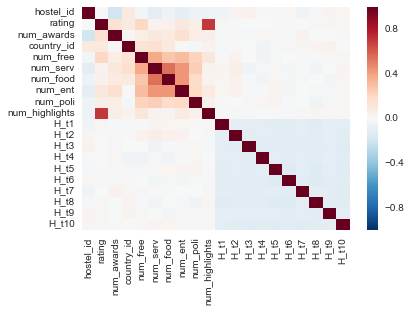

In [38]:
cor = hostels_small.corr()
sns.heatmap(cor)